<a href="https://colab.research.google.com/github/Althaf0097/Demo/blob/main/class_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('beer-servings.csv')
df.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [3]:
df.shape

(193, 7)

In [4]:
df.size

1351

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [7]:
df.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [8]:
df.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [9]:
null_columns = df[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']]

In [10]:
null_columns.isnull().sum()

,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1


In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(null_columns)
null_columns = imputer.transform(null_columns)

In [12]:
null_columns = pd.DataFrame(null_columns,columns=['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'])
null_columns.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


In [13]:
categorical_columns = df.drop(columns=['spirit_servings','beer_servings','total_litres_of_pure_alcohol','wine_servings','total_litres_of_pure_alcohol'])
categorical_columns.head()

,Unnamed: 0,country,continent
0,0,Afghanistan,Asia
1,1,Albania,Europe
2,2,Algeria,Africa
3,3,Andorra,Europe
4,4,Angola,Africa


In [14]:
df1 = pd.read_csv('beer-servings.csv')
df1.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [15]:
df1.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [16]:
median_value = df1['beer_servings'].median()
df1['beer_servings']= df['beer_servings'].fillna(median_value)


In [17]:
df1['beer_servings'].isna().sum()

0

In [18]:
median_value = df1['wine_servings'].median()
df1['wine_servings']= df['wine_servings'].fillna(median_value)


In [19]:
df1['wine_servings'].isna().sum()

0

In [20]:
for col in ['spirit_servings','total_litres_of_pure_alcohol']:
    df1[col] = df1[col].fillna(df1[col].median())

In [21]:
df1.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


In [22]:
from matplotlib import pyplot as plt

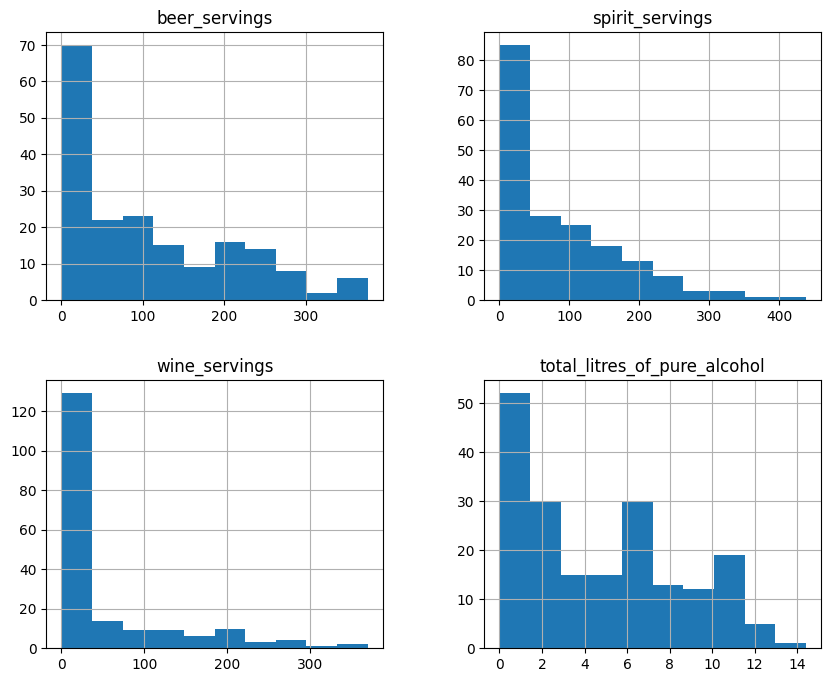

In [23]:
freplot = df.select_dtypes(include=['float'])
freplot.hist(figsize=(10,8))
plt.show()

In [24]:
df1.shape

(193, 7)

In [25]:
df1.size

1351

In [26]:
df1['Unnamed: 0'].nunique()

193

In [27]:
df1.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [28]:
df1.drop(columns=['country'],axis=1,inplace=True)
df1.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


In [29]:
df1.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.00000,193.000000
mean,103.917098,82.259067,48.88601,4.739119
std,98.580146,87.389366,79.41700,3.757996
min,0.000000,0.000000,0.00000,0.000000
25%,21.000000,5.000000,1.00000,1.300000
50%,76.000000,60.000000,9.00000,4.250000
75%,171.000000,128.000000,59.00000,7.200000
max,376.000000,438.000000,370.00000,14.400000


{'whiskers': [<matplotlib.lines.Line2D at 0x785dfad28c10>,
 'caps': [<matplotlib.lines.Line2D at 0x785dfad29150>,
 'boxes': [<matplotlib.lines.Line2D at 0x785dfad28970>,
 'medians': [<matplotlib.lines.Line2D at 0x785dfad29690>,
 'fliers': [<matplotlib.lines.Line2D at 0x785dfad29930>,
 'means': []}

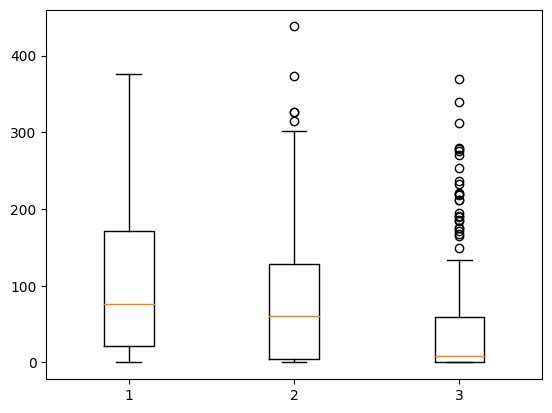

In [30]:
plt.boxplot(df1[['beer_servings','spirit_servings','wine_servings']])

<Axes: >

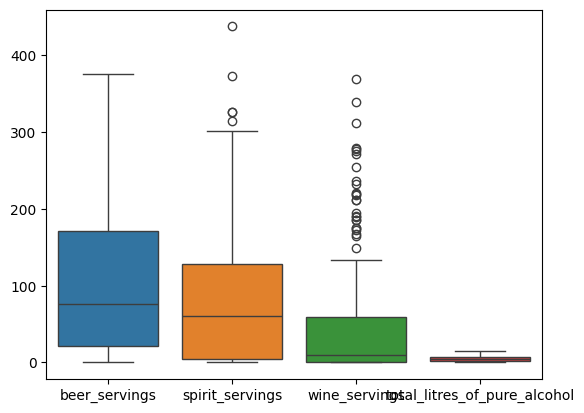

In [31]:
sns.boxplot(df1)

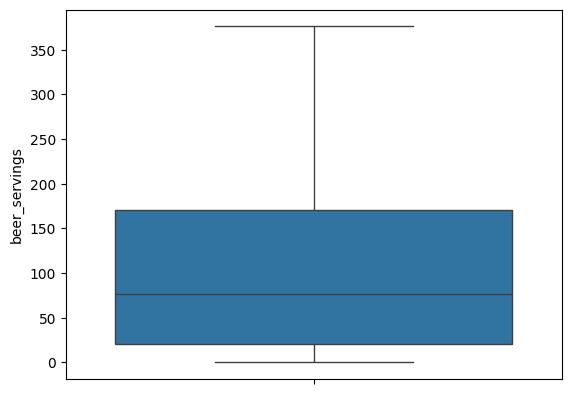

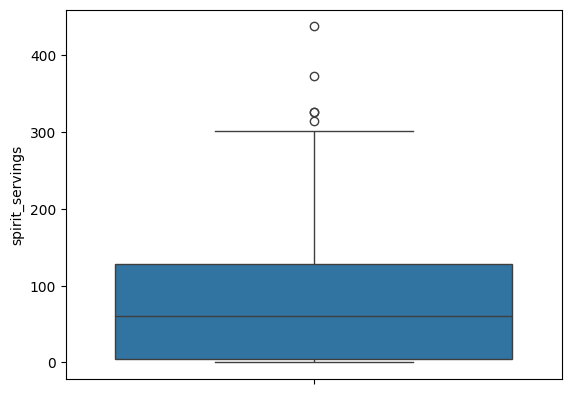

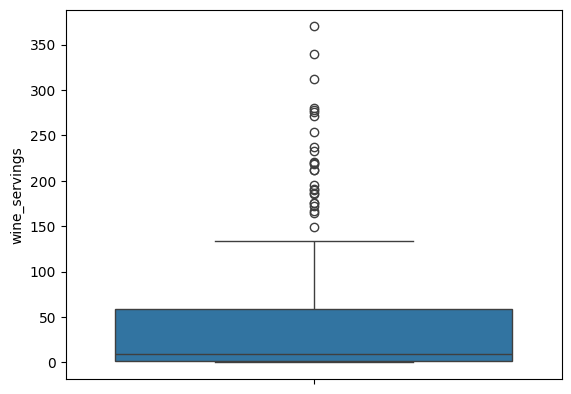

In [32]:
cols = ['beer_servings','spirit_servings','wine_servings']
for col in cols:
    sns.boxplot(df1[col])
    plt.show()

In [33]:
Q1 = np.percentile(df1['spirit_servings'],25,method='midpoint')
Q2 = np.percentile(df1['spirit_servings'],50,method='midpoint')
Q3 = np.percentile(df1['spirit_servings'],75,method='midpoint')
print(Q1,Q2,Q3)

5.0 60.0 128.0


In [34]:
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

-179.5 312.5


In [35]:
outlier = []

for row in df1['spirit_servings']:
    if row > upper_limit or row < lower_limit:
        outlier.append(row)

In [36]:
print(outlier)

[373.0, 438.0, 326.0, 326.0, 315.0]


In [37]:
ind1 = df1['spirit_servings'] > upper_limit
df1.loc[ind1].index


Index([15, 68, 73, 141, 144], dtype='int64')

In [38]:
print(ind1)

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: spirit_servings, Length: 193, dtype: bool


In [39]:
df1.drop([15, 68, 73, 141, 144],inplace=True)

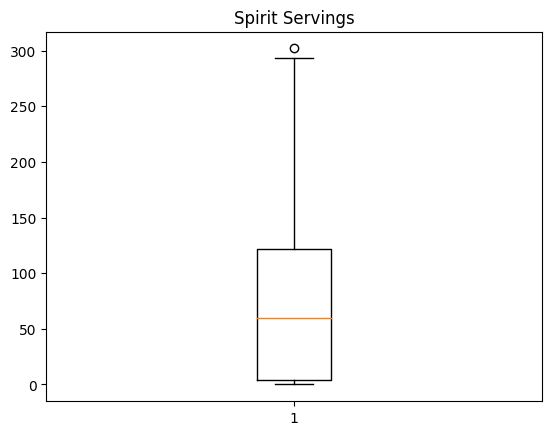

In [40]:
plt.boxplot(df1.spirit_servings)
plt.title('Spirit Servings')
plt.show()

In [41]:
Q1 = np.percentile(df1['wine_servings'],25,method='midpoint')
Q2 = np.percentile(df1['wine_servings'],50,method='midpoint')
Q3 = np.percentile(df1['wine_servings'],75,method='midpoint')
print(Q1,Q2,Q3)

1.0 9.0 57.5


In [42]:
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

-83.75 142.25


In [43]:
outlier = []
for row in df1['wine_servings']:
    if row > upper_limit or row < lower_limit:
        outlier.append(row)

In [44]:
print(outlier)

[312.0, 221.0, 212.0, 191.0, 212.0, 172.0, 254.0, 278.0, 233.0, 370.0, 149.0, 175.0, 218.0, 185.0, 165.0, 237.0, 271.0, 190.0, 175.0, 339.0, 167.0, 276.0, 186.0, 280.0, 195.0, 220.0]


In [45]:
ind2 = df1['wine_servings'] > upper_limit
df1.loc[ind2].index

Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,  75,
        81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
      dtype='int64')

In [46]:
print(ind2)

0      False
1      False
2      False
3       True
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: wine_servings, Length: 188, dtype: bool


In [49]:
df1.drop([3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,  75, 81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],inplace = True)

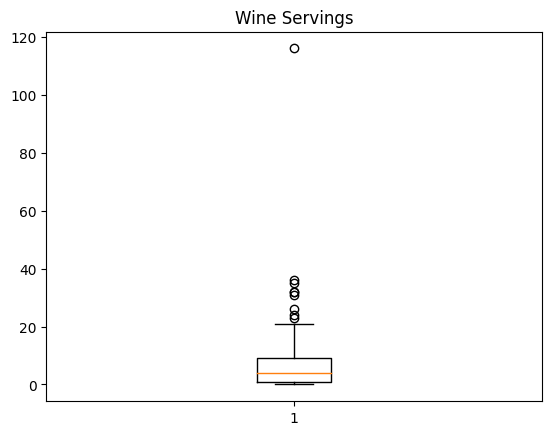

In [50]:
plt.boxplot(df1.wine_servings)
plt.title('Wine Servings')
plt.show()

In [51]:
Q1 = np.percentile(df1['beer_servings'],25,method='midpoint')
Q2 = np.percentile(df1['beer_servings'],50,method='midpoint')
Q3 = np.percentile(df1['beer_servings'],75,method='midpoint')
print(Q1,Q2,Q3)

12.5 39.5 80.5


In [52]:
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)

-89.5 182.5


In [53]:
outlier = []

for row in df1['beer_servings']:
    if row > upper_limit or row < lower_limit:
        outlier.append(row)

In [54]:
print(outlier)

[263.0, 245.0, 193.0, 238.0, 376.0, 188.0, 306.0, 285.0, 194.0, 196.0, 197.0]


In [55]:
ind3 = df1['spirit_servings'] > upper_limit
df1.loc[ind3].index


Index([36, 50, 72, 85, 87, 112, 125, 134, 139, 143, 145, 155, 169], dtype='int64')

In [56]:
print(ind3)

0      False
2      False
7      False
10     False
12     False
       ...  
188    False
189    False
190    False
191    False
192    False
Name: spirit_servings, Length: 134, dtype: bool


In [59]:
df1.drop([36, 50, 85, 87, 112, 125, 134, 139, 143, 145, 169],inplace=True)

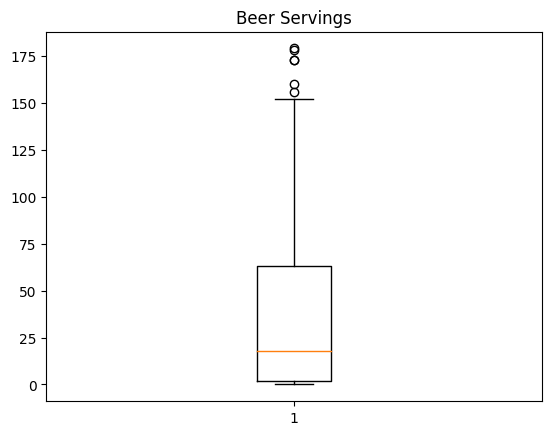

In [60]:
plt.boxplot(df1.spirit_servings)
plt.title('Beer Servings')
plt.show()

# **z score method**